In [56]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
import matplotlib.pylab as plt


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

# data load & 전처리

### train data

In [2]:
df_train = pd.read_csv('./data/act_train.csv', parse_dates=['date'])
df_people = pd.read_csv('./data/people.csv', parse_dates=['date'])
df_merge = pd.merge(df_train, df_people, on='people_id')

In [3]:
df_date_x = df_merge['date_x'].copy()
df_date_y = df_merge['date_y'].copy()

In [4]:
df_merge.drop(['date_x', 'date_y'], axis=1, inplace=True)

In [5]:
idx1 = df_merge.activity_id[df_merge.activity_id.str.contains('^act1')].index
idx2 = df_merge.activity_id[df_merge.activity_id.str.contains('^act2')].index
df_merge.activity_id.loc[idx1] = 1
df_merge.activity_id.loc[idx2] = 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df_merge.replace(['ppl_', 'group ', 'type '], ['', '', ''], regex=True, inplace = True)

In [7]:
df_merge = df_merge.apply(pd.to_numeric, errors='ignore')

##### add Past days, week

In [8]:
df_merge.insert(loc=2 ,column='date_x', value=df_date_x)
# df_merge.insert(loc=3 ,column='Past days_x', value=(df_merge['date_x'] - pd._libs.tslib.Timestamp('2022-07-17 00:00:00')))
df_merge.insert(loc=3 ,column='week_x', value=df_merge['date_x'].dt.weekday)
# df_merge.insert(loc=3 ,column='date_year_x', value=df_date_x.dt.year)
# df_merge.insert(loc=4 ,column='date_month_x', value=df_date_x.dt.month)
# df_merge.insert(loc=5 ,column='date_day_x', value=df_date_x.dt.day)
# df_merge['Past days_x']=(pd.to_numeric(df_merge['Past days_x'])/86400000000000).astype(int)

df_merge.insert(loc=18 ,column='date_y', value=df_date_y)
# df_merge.insert(loc=19 ,column='Past days_y', value=(df_merge['date_y'] - pd._libs.tslib.Timestamp('2020-05-18 00:00:00')))
df_merge.insert(loc=19 ,column='week_y', value=df_merge['date_y'].dt.weekday)
# df_merge.insert(loc=19 ,column='date_year_y', value=df_date_y.dt.year)
# df_merge.insert(loc=20 ,column='date_month_y', value=df_date_y.dt.month)
# df_merge.insert(loc=21 ,column='date_day_y', value=df_date_y.dt.day)
# df_merge['Past days_y']=(pd.to_numeric(df_merge['Past days_y'])/86400000000000).astype(int)

df_merge.insert(loc=4 ,column='Past days', value=(df_merge.date_x - df_merge.date_y).astype('timedelta64[D]'))

### test data

In [ ]:
# df_test = pd.read_csv('./data/act_test.csv', parse_dates=['date'])
# df_merge_test = pd.merge(df_test, df_people, how='inner', on='people_id')
# df_date_x_test = df_merge_test['date_x'].copy()
# df_date_y_test = df_merge_test['date_y'].copy()

# df_merge_test.drop(['date_x', 'date_y'], axis=1, inplace=True)

# df_merge_test = df_merge_test.replace('type ', '', regex=True).apply(pd.to_numeric, errors='ignore')

# idx1_test = df_merge_test.activity_id[df_merge_test.activity_id.str.contains('^act1')].index
# idx2_test = df_merge_test.activity_id[df_merge_test.activity_id.str.contains('^act2')].index
# df_merge_test.activity_id.loc[idx1_test] = 1
# df_merge_test.activity_id.loc[idx2_test] = 2

# df_merge_test.insert(loc=2 ,column='date_x', value=df_date_x_test)
# # df_merge_test.insert(loc=3 ,column='Past days_x', value=(df_merge_test['date_x'] - pd._libs.tslib.Timestamp('2022-07-17 00:00:00')))
# df_merge_test.insert(loc=3 ,column='week_x', value=df_merge_test['date_x'].dt.weekday)
# # df_merge_test.insert(loc=3 ,column='date_year_x', value=df_date_x_test.dt.year)
# # df_merge_test.insert(loc=4 ,column='date_month_x', value=df_date_x_test.dt.month)
# # df_merge_test.insert(loc=5 ,column='date_day_x', value=df_date_x_test.dt.day)

# df_merge_test.insert(loc=18 ,column='date_y', value=df_date_y_test)
# # df_merge_test.insert(loc=19 ,column='Past days_y', value=(df_merge_test['date_y'] - pd._libs.tslib.Timestamp('2020-05-18 00:00:00')))
# df_merge_test.insert(loc=19 ,column='week_y', value=df_merge_test['date_y'].dt.weekday)
# # df_merge_test.insert(loc=19 ,column='date_year_y', value=df_date_y_test.dt.year)
# # df_merge_test.insert(loc=20 ,column='date_month_y', value=df_date_y_test.dt.month)
# # df_merge_test.insert(loc=21 ,column='date_day_y', value=df_date_y_test.dt.day)
# df_merge_test['past days'] = (df_merge_test.date_x - df_merge_test.date_y).astype('timedelta64[D]')

In [9]:
del df_train, df_people, df_date_x, df_date_y, idx1, idx2
# del df_test, df_date_x_test, df_date_y_test, idx1_test, idx2_test

In [ ]:
# df_merge.to_csv("train_merge.csv")

In [ ]:
# df_merge = pd.read_csv('./train_merge.csv', parse_dates=['date_x', 'date_y'])

In [11]:
df_merge.head()

,people_id,activity_id,date_x,week_x,Past days,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,char_1_y,group_1,date_y,week_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,100.0,2,2023-08-26,5,788.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,100.0,2,2022-09-27,1,455.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,100.0,2,2022-09-27,1,455.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,100.0,2,2023-08-04,4,766.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,100.0,2,2023-08-26,5,788.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


# EDA

In [12]:
for d in ['date_x', 'date_y']:
    print('Start of ' + d + ': ' + str(df_merge[d].min().date()))
    print('  End of ' + d + ': ' + str(df_merge[d].max().date()))
    print('Range of ' + d + ': ' + str(df_merge[d].max() - df_merge[d].min()) + '\n')

Start of date_x: 2022-07-17
  End of date_x: 2023-08-31
Range of date_x: 410 days 00:00:00

Start of date_y: 2020-05-18
  End of date_y: 2023-08-31
Range of date_y: 1200 days 00:00:00



In [13]:
df_merge.describe()

,people_id,activity_id,week_x,Past days,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,char_1_y,group_1,week_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_38
count,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,2.039676e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06
mean,2.023863e+05,1.928268e+00,3.231972e+00,2.593235e+02,2.997433e+00,6.932449,5.188389,3.932145,2.799023,3.579881,2.010443,2.554275,5.275538,7.200761,5.038379e+02,4.439544e-01,1.906321e+00,1.620591e+04,3.142312e+00,2.448956e+00,1.786501e+01,1.223861e+01,5.760739e+00,2.744043e+00,1.077467e+01,3.093629e+00,3.476141e+00,4.998051e+01
std,1.159728e+05,2.580429e-01,1.558017e+00,2.748091e+02,1.314068e+00,6.923220,4.769402,2.150886,1.060304,2.261971,0.815512,1.575641,3.036524,4.936222,1.202242e+03,4.968491e-01,2.913810e-01,9.785621e+03,1.528937e+00,6.593571e-01,1.583957e+01,9.255424e+00,2.724680e+00,1.407350e+00,6.454917e+00,1.548692e+00,1.932350e+00,3.608557e+01
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.032760e+05,2.000000e+00,2.000000e+00,1.700000e+01,2.000000e+00,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000e+00,0.000000e+00,2.000000e+00,9.107000e+03,2.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,2.041670e+05,2.000000e+00,3.000000e+00,1.710000e+02,3.000000e+00,5.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,4.000000,7.000000,2.000000e+00,0.000000e+00,2.000000e+00,1.730400e+04,3.000000e+00,3.000000e+00,1.000000e+01,7.000000e+00,5.000000e+00,3.000000e+00,9.000000e+00,3.000000e+00,3.000000e+00,5.900000e+01
75%,2.997910e+05,2.000000e+00,4.000000e+00,4.230000e+02,4.000000e+00,10.000000,6.000000,5.000000,3.000000,6.000000,3.000000,3.000000,6.000000,10.000000,4.500000e+02,1.000000e+00,2.000000e+00,1.852800e+04,4.000000e+00,3.000000e+00,4.000000e+01,2.500000e+01,9.000000e+00,4.000000e+00,1.600000e+01,3.000000e+00,4.000000e+00,8.200000e+01
max,3.982380e+05,2.000000e+00,6.000000e+00,1.197000e+03,7.000000e+00,52.000000,32.000000,11.000000,7.000000,7.000000,5.000000,8.000000,18.000000,19.000000,9.251000e+03,1.000000e+00,2.000000e+00,5.146200e+04,6.000000e+00,3.000000e+00,4.400000e+01,2.500000e+01,9.000000e+00,7.000000e+00,2.500000e+01,8.000000e+00,9.000000e+00,1.000000e+02


In [14]:
df_merge[['date_x', 'date_y']].describe()

,date_x,date_y
count,2197291,2197291
unique,411,1196
top,2022-09-30 00:00:00,2022-03-02 00:00:00
freq,48174,55371
first,2022-07-17 00:00:00,2020-05-18 00:00:00
last,2023-08-31 00:00:00,2023-08-31 00:00:00


In [16]:
pd.DataFrame(df_merge.people_id, dtype='object').describe()

,people_id
count,2197291.0
unique,151295.0
top,294918.0
freq,55103.0


In [17]:
df_merge.people_id.unique()

array([  1.00000000e+02,   1.00002000e+05,   1.00003000e+05, ...,
         9.99900000e+03,   9.99920000e+04,   9.99940000e+04])

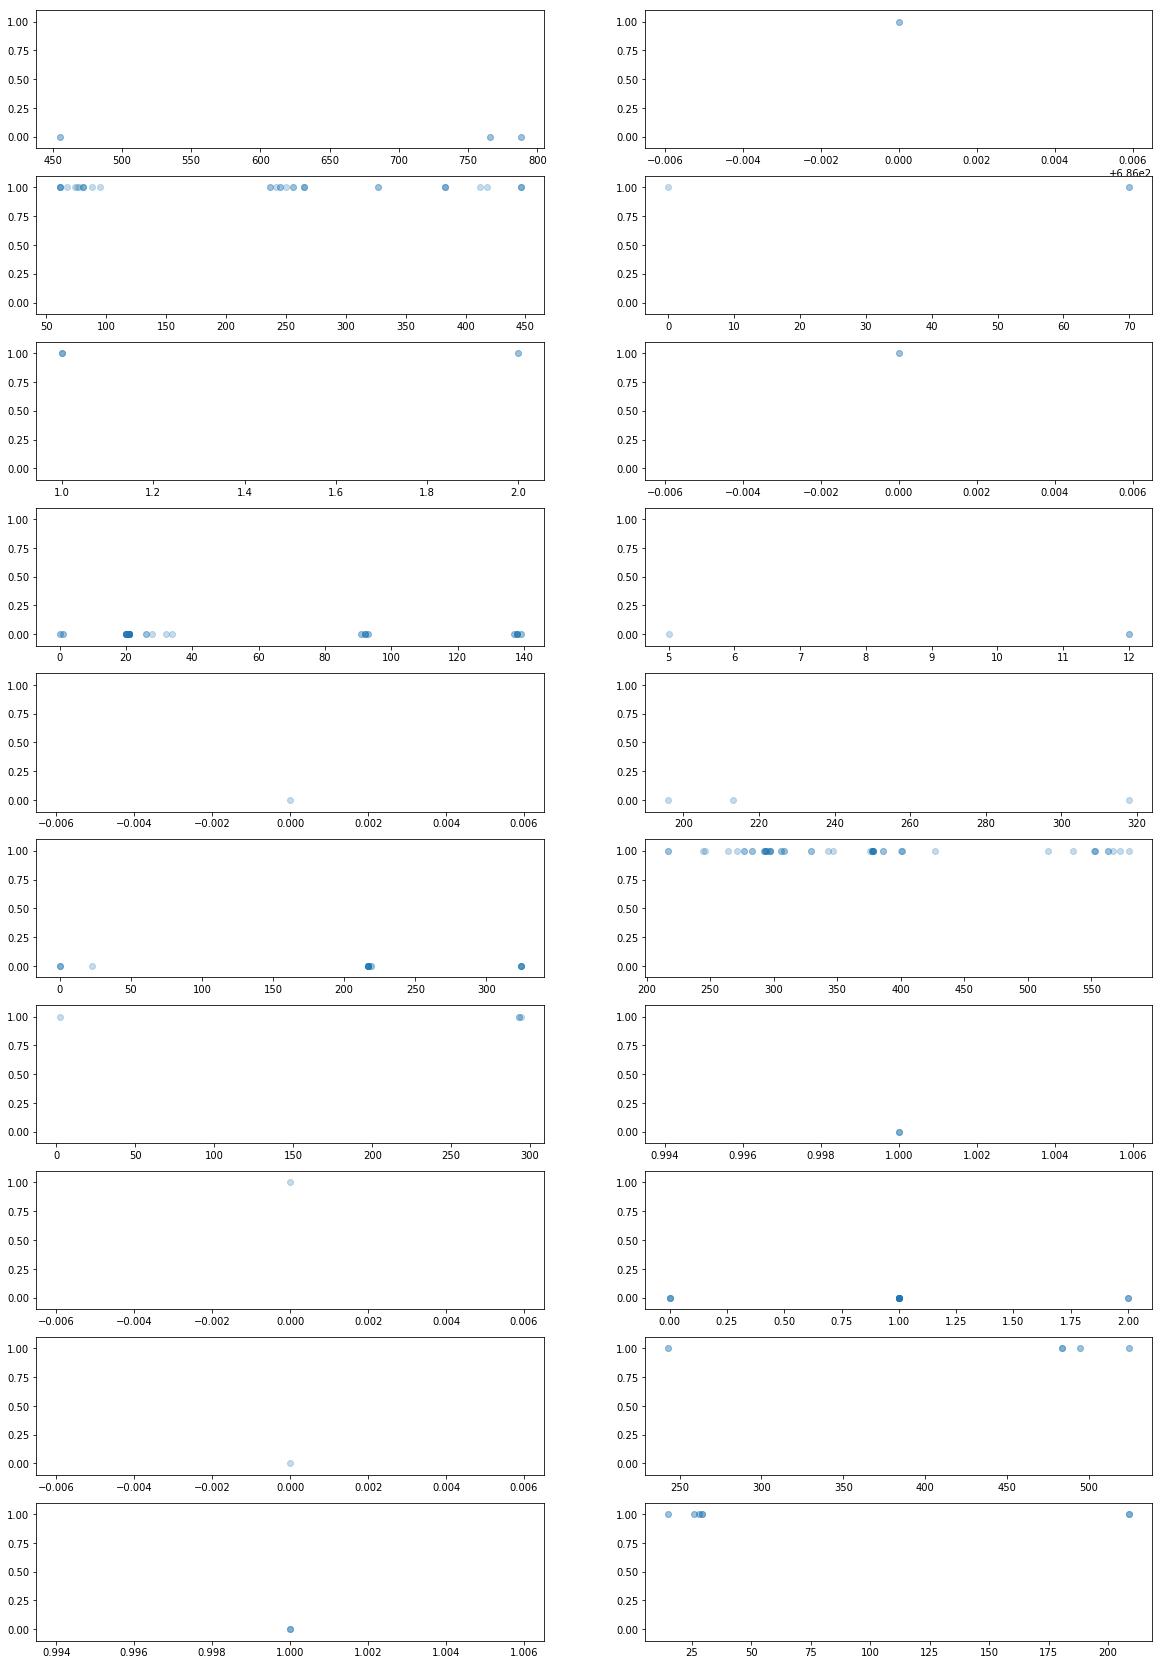

In [18]:
# ppl 별 구매 경향
plt.figure(figsize=(20,30))
for i, ppl in enumerate(df_merge.people_id.unique()[:20]):
    plt.subplot(10,2,i+1)    
    plt.scatter(df_merge[df_merge.people_id == ppl]['Past days'], \
                df_merge[df_merge.people_id == ppl].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

In [19]:
df_merge.people_id.value_counts().head()

294918.0    55103
370270.0    53668
105739.0    45936
54699.0     23969
64887.0      7052
Name: people_id, dtype: int64

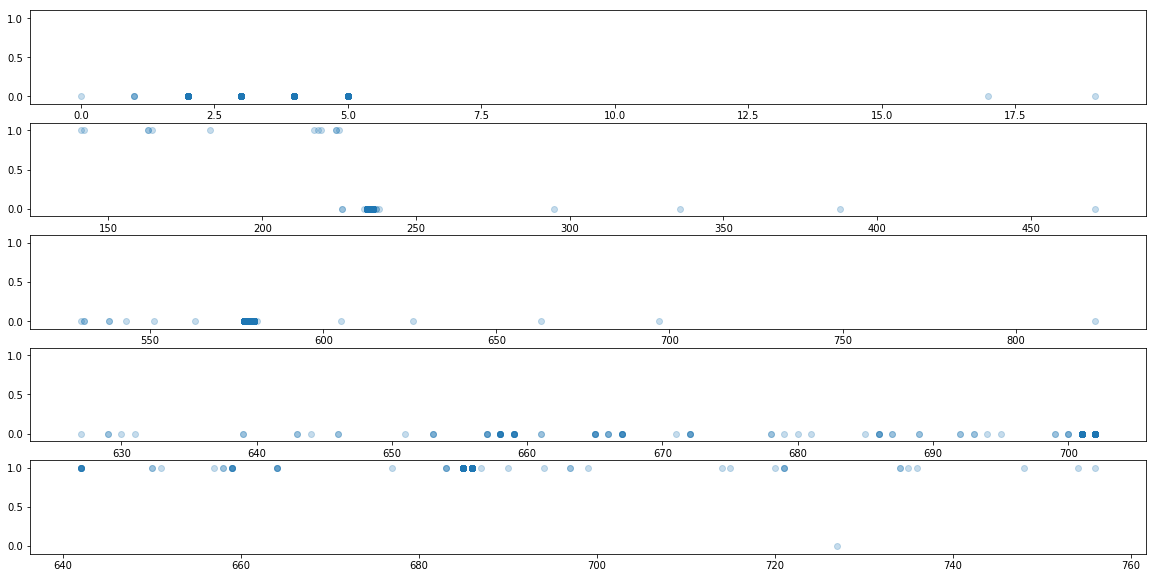

In [20]:
# ppl 별 구매 경향 top 5
plt.figure(figsize=(20,10))
for i, ppl in enumerate([294918, 370270, 105739, 54699, 64887]):
    plt.subplot(5,1,i+1)    
    plt.scatter(df_merge[df_merge.people_id == ppl]['Past days'], \
                df_merge[df_merge.people_id == ppl].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

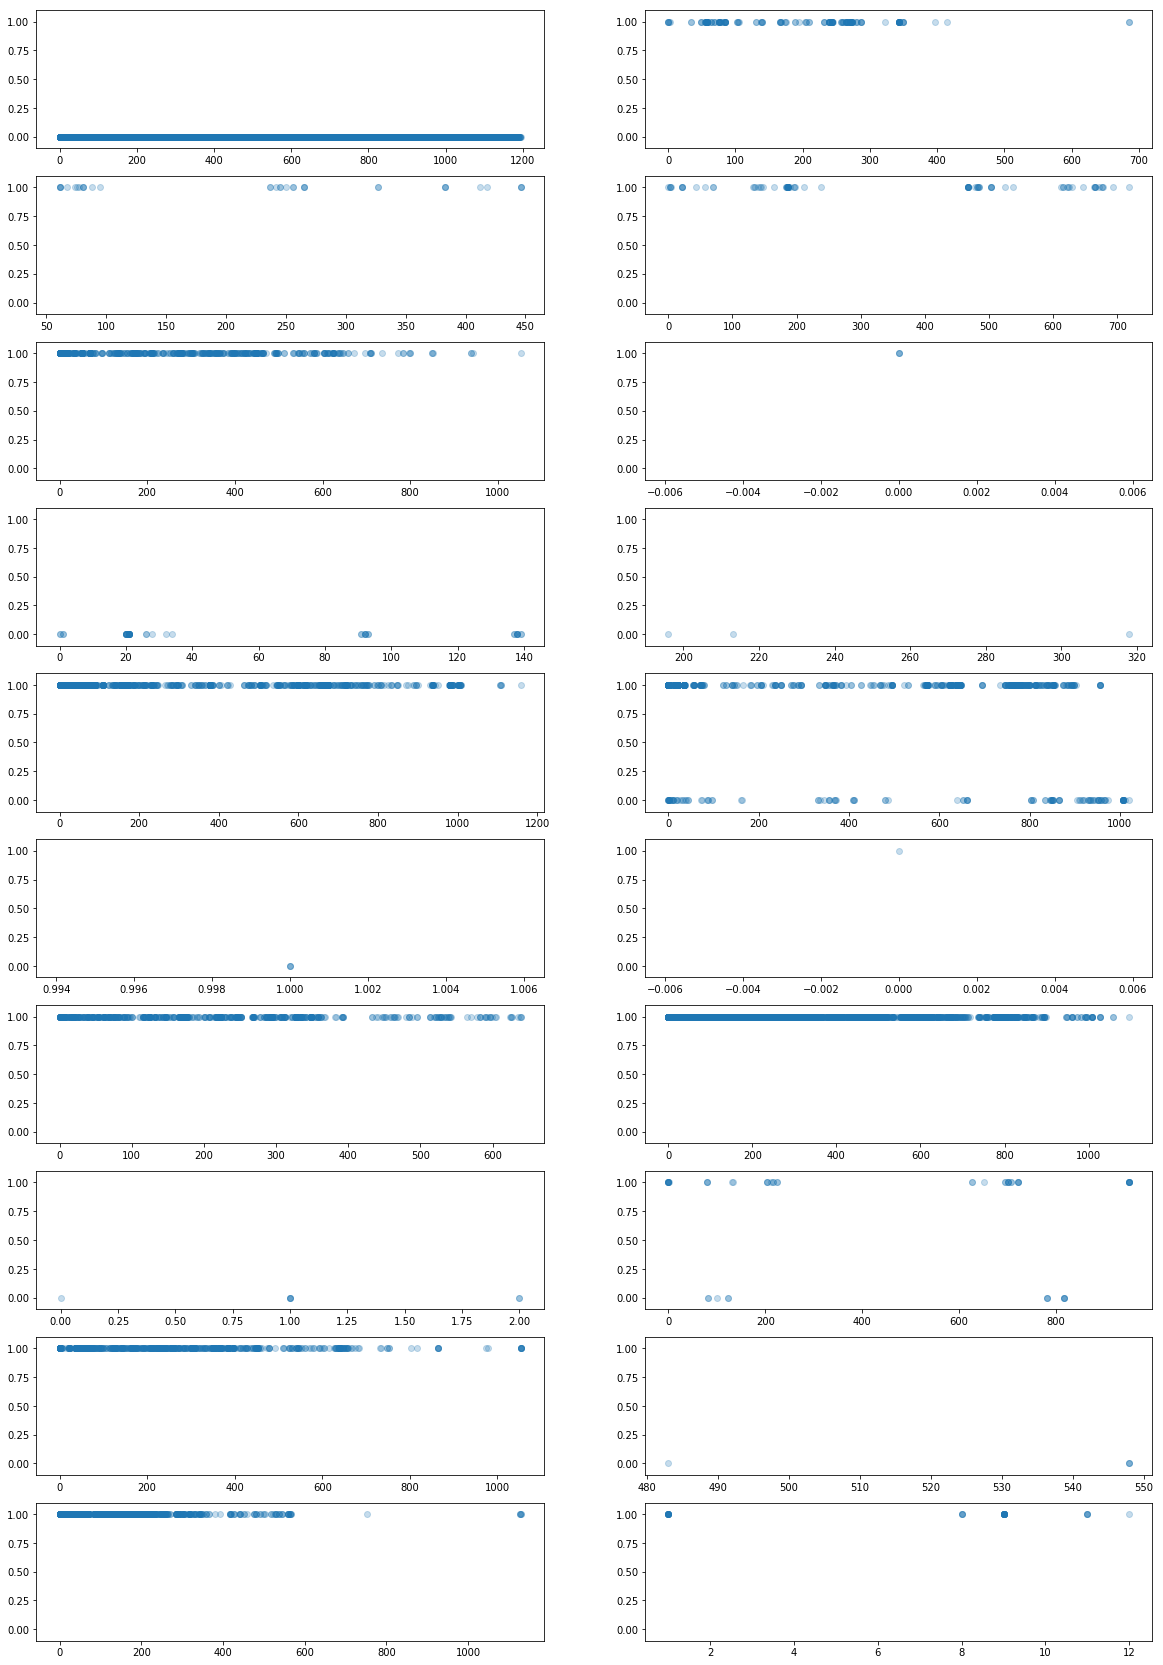

In [21]:
# group 별 구매 경향
plt.figure(figsize=(20,30))
for i, group in enumerate(df_merge.group_1.unique()[:20]):
    plt.subplot(10,2,i+1)    
    plt.scatter(df_merge[df_merge.group_1 == group]['Past days'], \
                df_merge[df_merge.group_1 == group].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

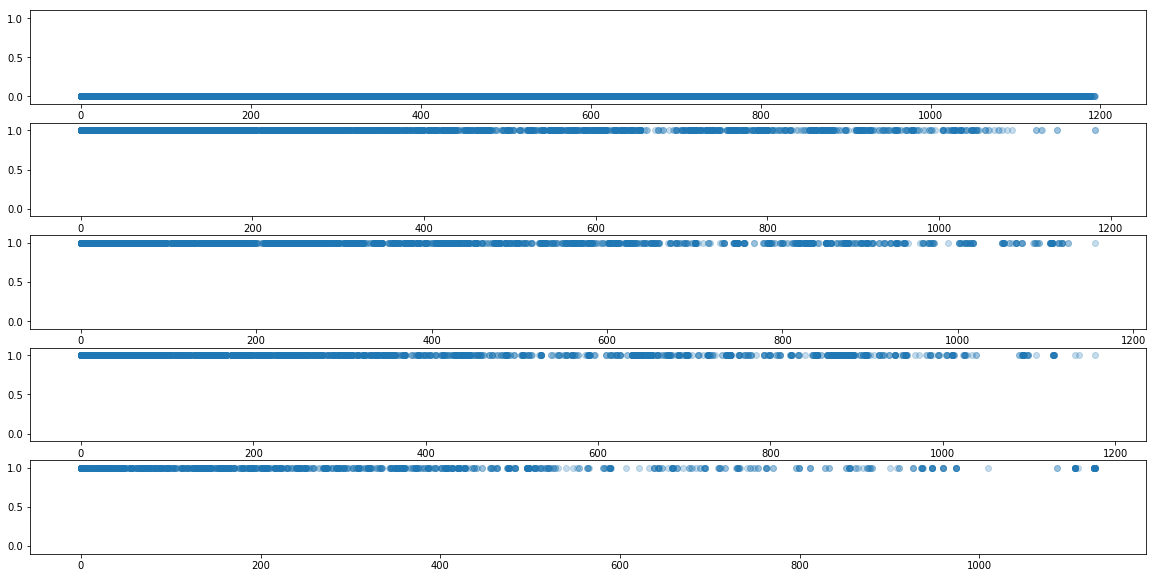

In [22]:
# group 별 구매 경향 top 5

plt.figure(figsize=(20,10))
for i, group in enumerate([17304, 667, 8386, 9280,450]):
    plt.subplot(5,1,i+1)    
    plt.scatter(df_merge[df_merge.group_1 == group]['Past days'], \
                df_merge[df_merge.group_1 == group].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

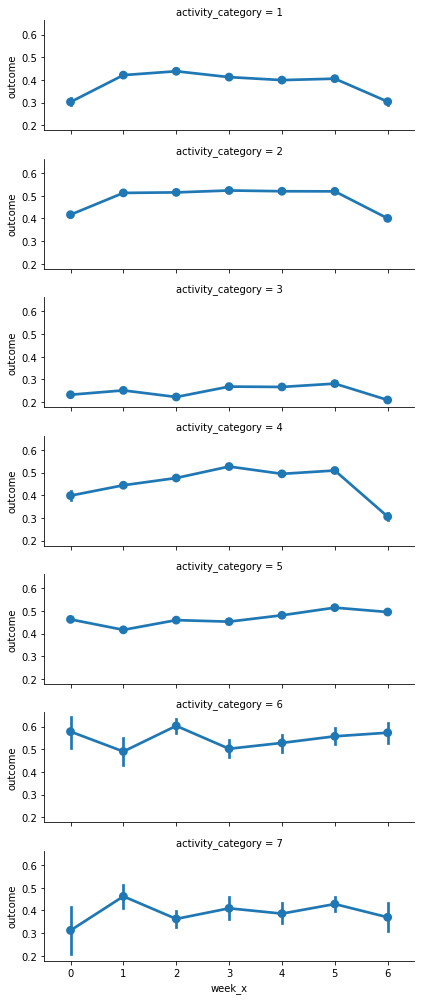

In [53]:
sns.factorplot(x="week_x", y="outcome", row="activity_category", data=df_merge,
               size=2, aspect=3, kind="point")
plt.show()

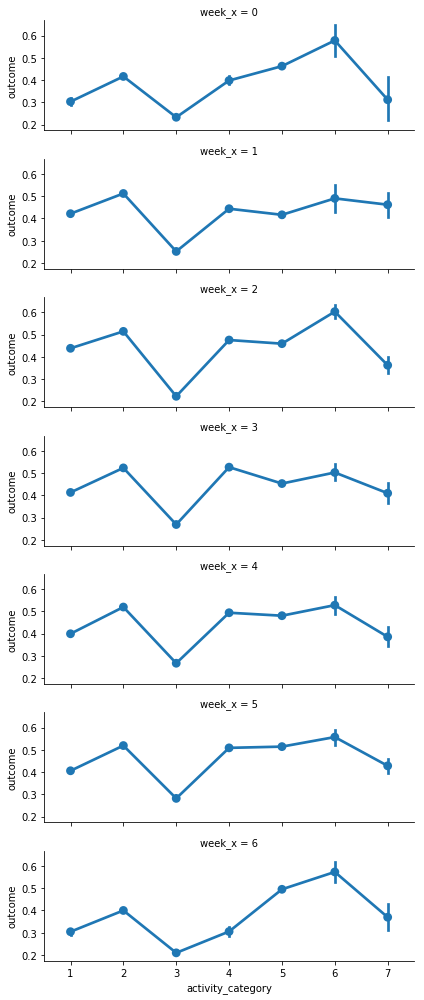

In [54]:
sns.factorplot(x="activity_category", y="outcome", row="week_x", data=df_merge,
               size=2, aspect=3, kind="point")
plt.show()

#### sample

In [23]:
df_sample = df_merge.sample(frac = 0.1, random_state=0).copy()

In [24]:
df_sample.groupby(['activity_id', 'activity_category']).count()

people_id  date_x  week_x  Past days  char_1_x  \
activity_id activity_category                                                   
1           1                      15813   15813   15813      15813     15813   
2           2                      90498   90498   90498      90498         0   
            3                      42804   42804   42804      42804         0   
            4                      20891   20891   20891      20891         0   
            5                      48968   48968   48968      48968         0   
            6                        429     429     429        429         0   
            7                        326     326     326        326         0   

                               char_2_x  char_3_x  char_4_x  char_5_x  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                         0         0         0         0   
            3                         0         0         0         0   
            4                         0         0         0         0   
            5                         0         0         0         0   
            6                         0         0         0         0   
            7                         0         0         0         0   

                               char_6_x  char_7_x  char_8_x  char_9_x  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                         0         0         0         0   
            3                         0         0         0         0   
            4                         0         0         0         0   
            5                         0         0         0         0   
            6                         0         0         0         0   
            7                         0         0         0         0   

                               char_10_x  outcome  char_1_y  group_1  date_y  \
activity_id activity_category                                                  
1           1                          0    15813     15813    15813   15813   
2           2                      90498    90498     90498    90498   90498   
            3                      42804    42804     42804    42804   42804   
            4                      20891    20891     20891    20891   20891   
            5                      48968    48968     48968    48968   48968   
            6                        429      429       429      429     429   
            7                        326      326       326      326     326   

                               week_y  char_2_y  char_3_y  char_4_y  char_5_y  \
activity_id activity_category                                                   
1           1                   15813     15813     15813     15813     15813   
2           2                   90498     90498     90498     90498     90498   
            3                   42804     42804     42804     42804     42804   
            4                   20891     20891     20891     20891     20891   
            5                   48968     48968     48968     48968     48968   
            6                     429       429       429       429       429   
            7                     326       326       326       326       326   

                               char_6_y  char_7_y  char_8_y  char_9_y  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                     90498     90498     90498     90498   
            3                     42804     42804     42804     42804   
            4                     20891     20891     20891     20891   
            5                     48968     48968     48968     48968   
            6          

In [25]:
df_sample_0 = df_sample[df_sample.outcome==0].copy()
df_sample_1 = df_sample[df_sample.outcome==1].copy()

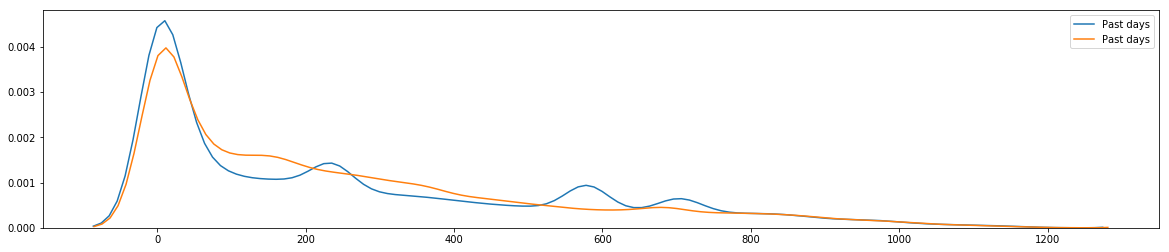

In [27]:
plt.figure(figsize=(20,4))
sns.kdeplot(df_sample_0['Past days'])
sns.kdeplot(df_sample_1['Past days'])
plt.show()

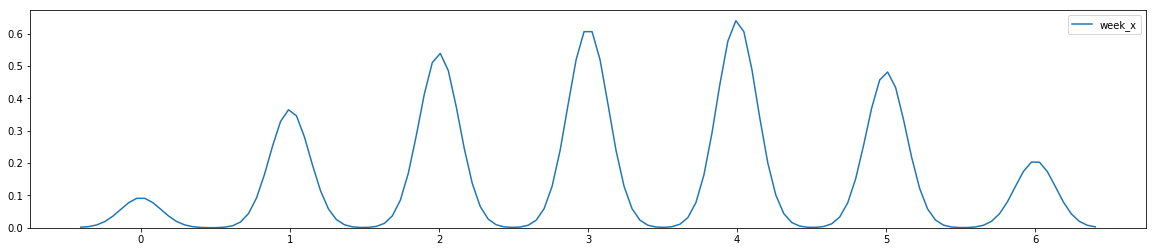

In [29]:
plt.figure(figsize=(20,4))
sns.kdeplot(df_sample_0['week_x'])
sns.kdeplot(df_sample_1['week_x'])
plt.show()

#### char_1_x ~ char_9_x

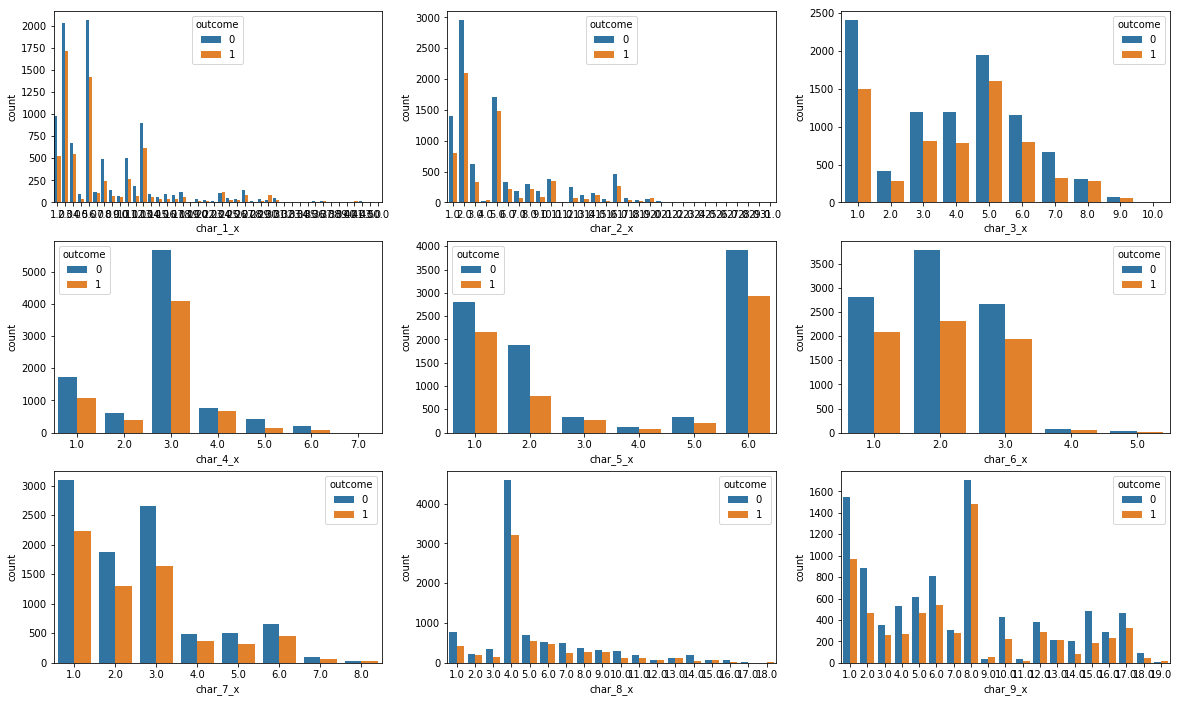

In [30]:
plt.figure(figsize=(20,12))
for i, feat in enumerate(df_sample.columns[6:15]):
    plt.subplot(3,3,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

#### char_2_y ~ char_9_y

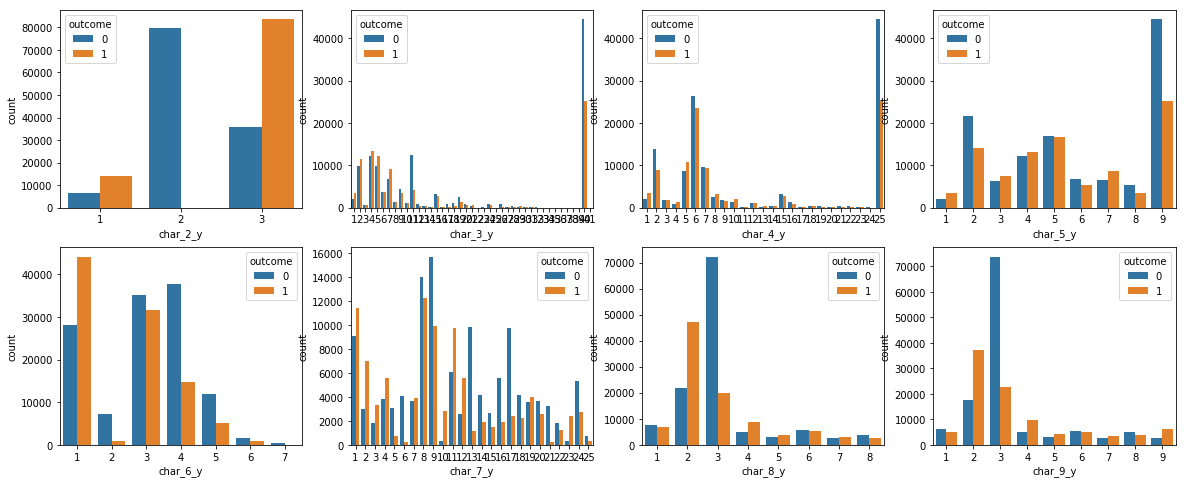

In [31]:
plt.figure(figsize=(20,8))
for i, feat in enumerate(df_sample.columns[-37:-29]):
    plt.subplot(2,4,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

#### char_10_y ~ char_37

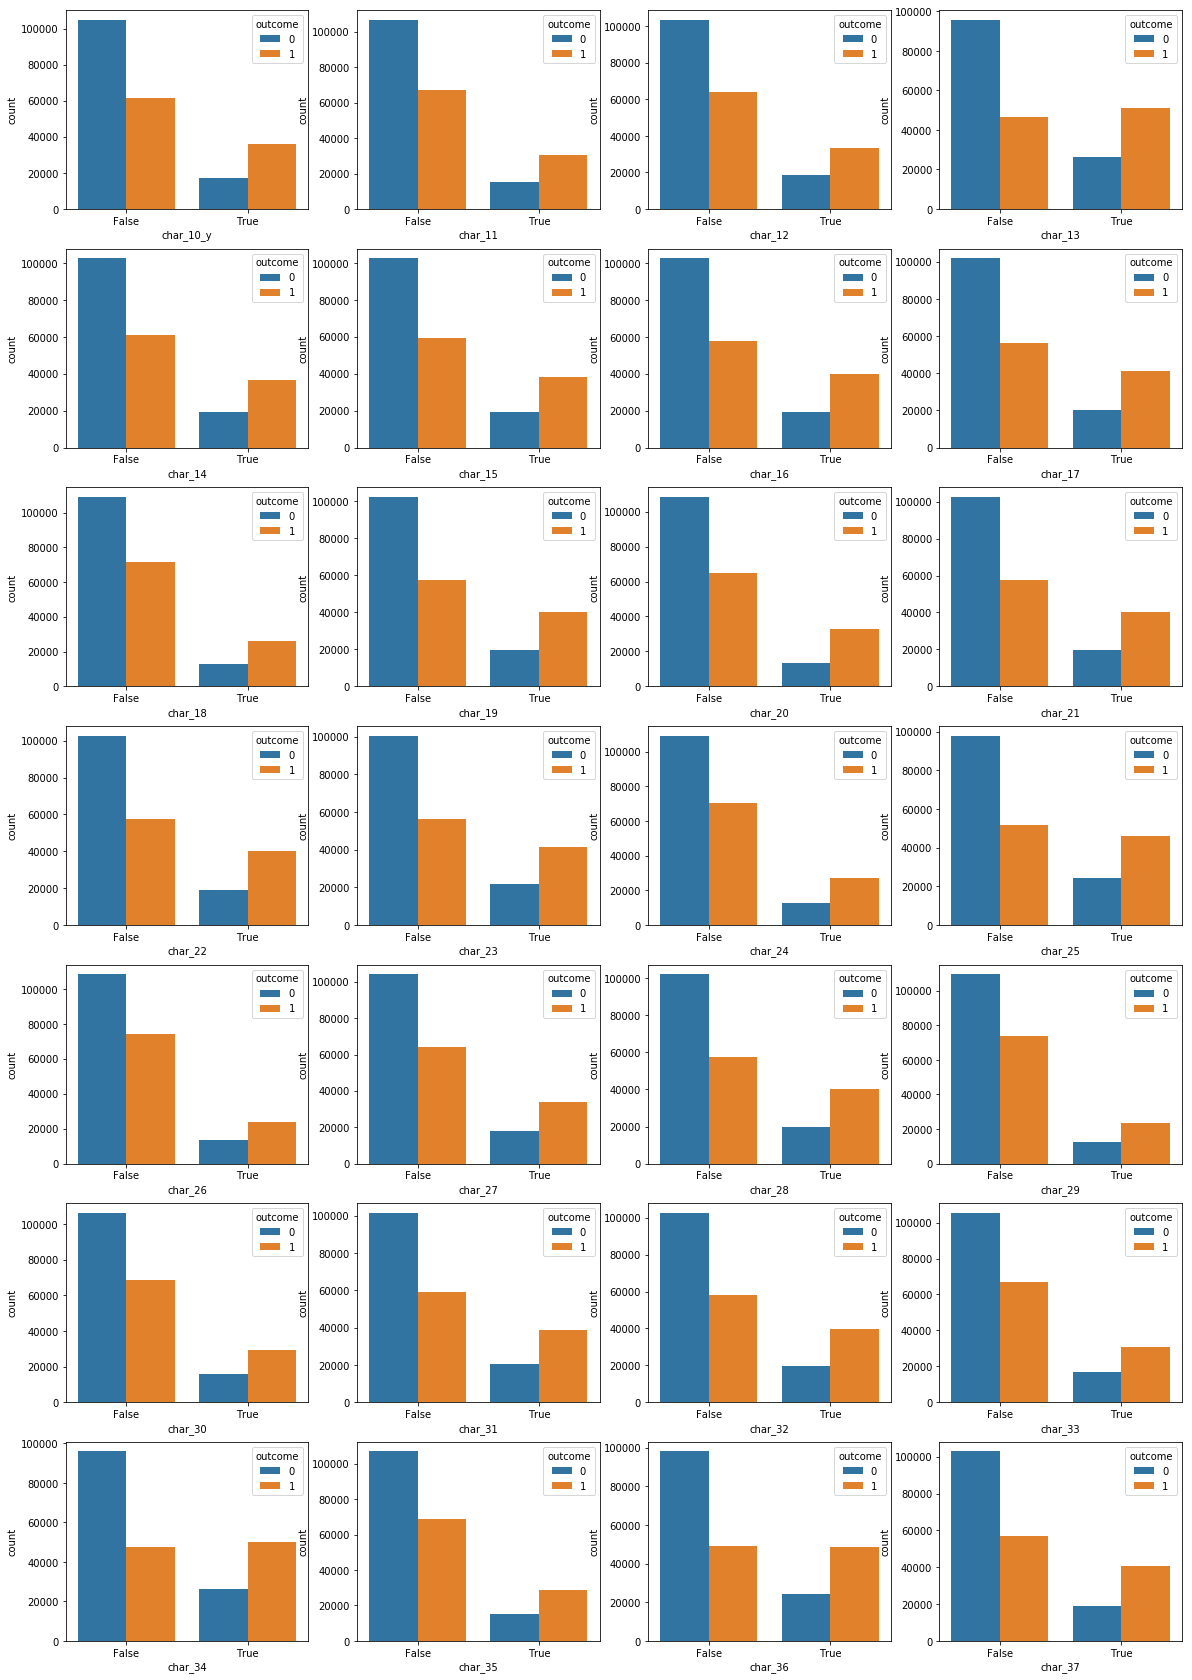

In [32]:
plt.figure(figsize=(20,30))
for i, feat in enumerate(df_sample.columns[-29:-1]):
    plt.subplot(7,4,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

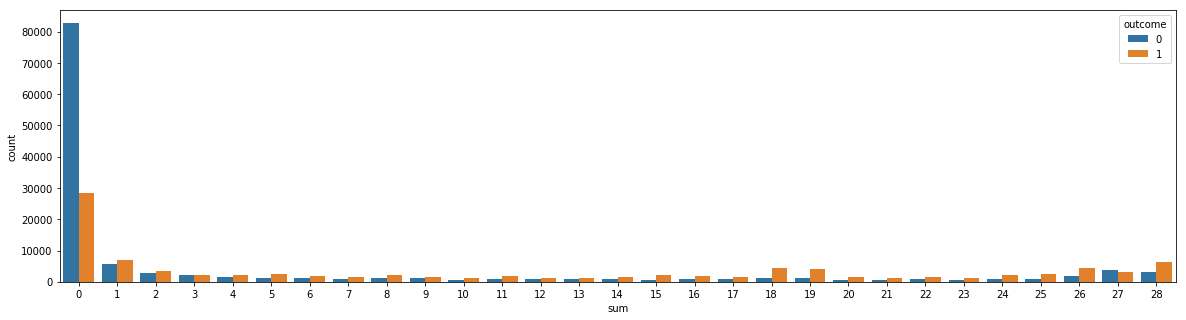

In [35]:
df_sum = pd.concat([df_sample.iloc[:,-29:-1].sum(axis=1), df_sample['outcome']], axis=1)
df_sum.columns = ['sum', 'outcome']

plt.figure(figsize=(20,5))
sns.countplot('sum', hue='outcome', data=df_sum)
plt.show()

#### char_38

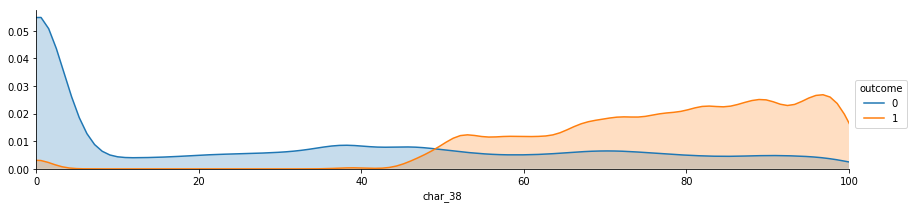

In [33]:
facet = sns.FacetGrid(df_sample, hue='outcome', aspect=4)
facet.map(sns.kdeplot, 'char_38', shade=True)
facet.set(xlim=(0, df_sample['char_38'].max()))
facet.add_legend()

plt.show()

# feature selection

In [44]:
model1 = sm.OLS.from_formula("outcome ~ char_10_y + char_11 + char_12 + char_13 + char_14 + char_15 + char_16 + char_17 + char_18 + \
                            char_19 + char_20 + char_21 + char_22 + char_23 + char_24 + char_25 + char_26 + char_27 + char_28 + \
                            char_29 + char_30 + char_31 + char_32 + char_33 + char_34 + char_35 + char_36 + char_37", data=df_sample)
model2 = sm.OLS.from_formula("outcome ~ sum", data=df_sum)

result1 = model1.fit()
result2 = model2.fit()

sm.stats.anova_lm(result1, result2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,219700.0,46857.157836,0.0,NaN,NaN,NaN
1,219727.0,48809.115099,-27.0,-1951.957263,325.453565,NaN


In [41]:
sm.stats.anova_lm(result1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
char_10_y,1.0,3897.277449,3897.277449,18273.234976,0.000000e+00
char_11,1.0,351.633842,351.633842,1648.711930,0.000000e+00
char_12,1.0,127.622569,127.622569,598.386238,5.649735e-132
char_13,1.0,1416.133030,1416.133030,6639.848449,0.000000e+00
char_14,1.0,64.990676,64.990676,304.722951,3.427460e-68
char_15,1.0,34.372966,34.372966,161.165146,6.487422e-37
char_16,1.0,38.722422,38.722422,181.558519,2.299325e-41
char_17,1.0,58.783017,58.783017,275.616993,7.388177e-62
char_18,1.0,4.212364,4.212364,19.750585,8.827773e-06
char_19,1.0,1.880477,1.880477,8.817028,2.984646e-03


In [40]:
sm.stats.anova_lm(result2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
sum,1.0,5442.363904,5442.363904,24500.224828,0.0
Residual,219727.0,48809.115099,0.222135,NaN,NaN


# modeling

## 나이브 베이즈

In [60]:
X = df_sample['Past days']; y = df_sample.outcome

In [ ]:
sns.distplot(X0, rug=True, kde=False, norm_hist=True)
plt.legend()
plt.xlim(-6,6)
plt.show()

KeyboardInterrupt: 

In [45]:
df_tree = df_sample.copy()

In [ ]:
df_tree

In [46]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=['activity_category', 'char_38', 'char_1_y', 'char_2_y'])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [ ]:
df_tree_X = df_sample[['activity_category', 'date_x', 'char_1_y', 'char_2_y','char_38']].copy()
df_tree_y = df_sample['outcome'].copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(df_tree_X, df_tree_y)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df_tree_y, tree.predict(df_tree_X))